In [13]:
pip install scikeras


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier


# Load the dataset
df = pd.read_csv('Alphabets_data.csv')
df.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [2]:
# Task 1: Data Exploration and Preprocessing
print("Dataset Info:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())

print("\nMissing Values:")
print(df.isnull().sum())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB
None

Summary Statistics:
               xbox          ybox         width       height         onpix  \
count  20000.000000  20000.000000  200

In [2]:
# Check class distribution
print("\n letter Class Distribution:")
print(df['letter'].value_counts())


 letter Class Distribution:
letter
U    813
D    805
P    803
T    796
M    792
A    789
X    787
Y    786
N    783
Q    783
F    775
G    773
E    768
B    766
V    764
L    761
R    758
I    755
O    753
W    752
S    748
J    747
K    739
C    736
H    734
Z    734
Name: count, dtype: int64


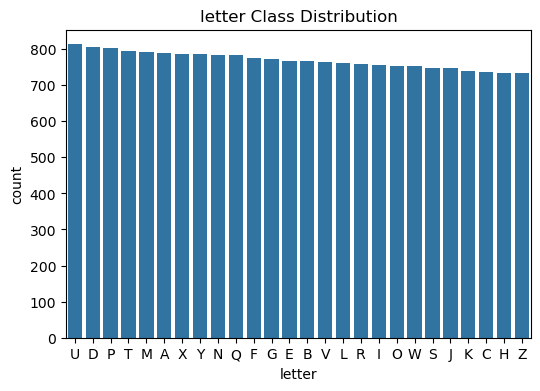

In [3]:
# Visualize class distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='letter', order=df['letter'].value_counts().index)
plt.title("letter Class Distribution")
plt.show()

In [4]:
# Separate features and target
X = df.drop('letter', axis=1)  # Replace 'Class' with the actual target column name
y = df['letter']

# Encode target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [5]:
# Task 2: Model Implementation
def create_ann_model(hidden_layers=1, neurons_per_layer=64, activation='relu', learning_rate=0.001):
    """Build an ANN model with specified hyperparameters."""
    from tensorflow.keras.optimizers import Adam
    model = Sequential()
    model.add(Dense(neurons_per_layer, input_dim=X_train.shape[1], activation=activation))
    for _ in range(hidden_layers - 1):
        model.add(Dense(neurons_per_layer, activation=activation))
    model.add(Dense(len(np.unique(y)), activation='softmax'))  # Output layer
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model




In [6]:
# Build and train a basic ANN model
basic_model = create_ann_model()
basic_model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1, validation_split=0.1)

# Evaluate the basic model
y_pred_basic = np.argmax(basic_model.predict(X_test), axis=1)
print("\nBasic ANN Model Performance:")
print(classification_report(y_test, y_pred_basic))

C:\Users\punee\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3065 - loss: 2.5907 - val_accuracy: 0.6750 - val_loss: 1.2807
Epoch 2/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6919 - loss: 1.1708 - val_accuracy: 0.7594 - val_loss: 0.9263
Epoch 3/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7660 - loss: 0.8681 - val_accuracy: 0.7875 - val_loss: 0.7835
Epoch 4/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7931 - loss: 0.7338 - val_accuracy: 0.8169 - val_loss: 0.6946
Epoch 5/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8114 - loss: 0.6679 - val_accuracy: 0.8306 - val_loss: 0.6320
Epoch 6/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8287 - loss: 0.6013 - val_accuracy: 0.8444 - val_loss: 0.5870
Epoch 7/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8387 - loss: 0.5622 - val_accuracy: 0.8544 - val_loss: 0.5467
Epoch 8/20
450/450 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8533 - loss: 0.5084 - val_accuracy: 0.

In [9]:

# Task 3: Hyperparameter Tuning
def ann_model(hidden_layers=1, neurons_per_layer=64, activation='relu', learning_rate=0.001):
    """Wrapper function for GridSearch."""
    return create_ann_model(hidden_layers, neurons_per_layer, activation, learning_rate)

# Wrap the model for use in GridSearchCV
model = KerasClassifier(build_fn=ann_model, verbose=0)

# Define hyperparameter grid
# Prefix Keras model parameters with 'model__'
param_grid = {
    'model__hidden_layers': [2],
    'model__activation': ['relu'],
    'model__learning_rate': [0.001],
    'epochs': [20],  # These are KerasClassifier parameters
    'batch_size': [32] # These are KerasClassifier parameters
}


# # Define hyperparameter grid
# param_grid = {
#     'hidden_layers': [1, 2, 3],
#     'neurons_per_layer': [32, 64, 128],
#     'activation': ['relu', 'tanh'],
#     'learning_rate': [0.001, 0.01],
#     'epochs': [20, 30],
#     'batch_size': [32, 64]
# }
# Perform Grid Search


grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, verbose=2, scoring='accuracy')
grid_result = grid.fit(X_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


C:\Users\punee\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\punee\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=20, model__activation=relu, model__hidden_layers=2, model__learning_rate=0.001; total time=  15.5s


C:\Users\punee\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\punee\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=20, model__activation=relu, model__hidden_layers=2, model__learning_rate=0.001; total time=  14.8s


C:\Users\punee\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\punee\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=20, model__activation=relu, model__hidden_layers=2, model__learning_rate=0.001; total time=  15.6s


C:\Users\punee\anaconda3\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
C:\Users\punee\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
# Display best parameters and best score
print("\nBest Parameters from Grid Search:")
print(grid_result.best_params_)

# Train the best model
best_model = grid_result.best_estimator_

# Evaluate the tuned model
y_pred_tuned = best_model.predict(X_test)
print("\nTuned ANN Model Performance:")
print(classification_report(y_test, y_pred_tuned))


Best Parameters from Grid Search:
{'batch_size': 32, 'epochs': 20, 'model__activation': 'relu', 'model__hidden_layers': 2, 'model__learning_rate': 0.001}

Tuned ANN Model Performance:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       158
           1       0.89      0.94      0.92       153
           2       0.97      0.97      0.97       147
           3       0.97      0.91      0.94       161
           4       0.87      0.94      0.91       154
           5       0.93      0.87      0.90       155
           6       0.96      0.96      0.96       155
           7       0.79      0.93      0.85       147
           8       0.92      0.93      0.93       151
           9       0.96      0.93      0.94       149
          10       0.92      0.92      0.92       148
          11       0.95      0.95      0.95       152
          12       0.98      0.96      0.97       158
          13       0.94      0.92      0.93       157
    

In [11]:
# Task 4: Evaluation and Comparison
# Compare performance of the basic and tuned models
basic_accuracy = accuracy_score(y_test, y_pred_basic)
tuned_accuracy = accuracy_score(y_test, y_pred_tuned)

print("\nModel Comparison:")
print(f"Basic ANN Model Accuracy: {basic_accuracy:.4f}")
print(f"Tuned ANN Model Accuracy: {tuned_accuracy:.4f}")


Model Comparison:
Basic ANN Model Accuracy: 0.9035
Tuned ANN Model Accuracy: 0.9385


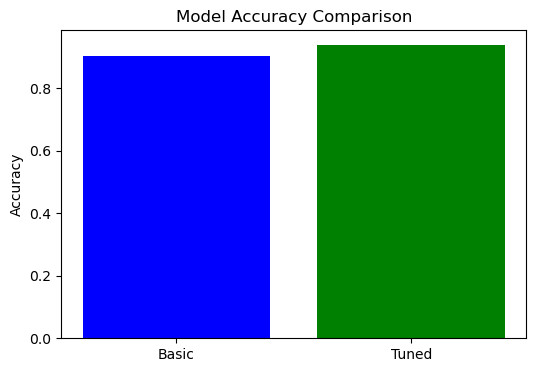

In [12]:
# Plot model comparison
plt.figure(figsize=(6, 4))
plt.bar(['Basic', 'Tuned'], [basic_accuracy, tuned_accuracy], color=['blue', 'green'])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()